# MovieLens Data Project

### Exploratory Data Analysis

First step in the exploratory process was to import data analysis libraries and to read in the data from `ml-latest-small`. This file contained different datasets titled *movies*, *ratings*, and *tags*.

In [1]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dir_path = "ml-latest-small"
movies = pd.read_csv(f"{dir_path}/movies.csv")
ratings = pd.read_csv(f"{dir_path}/ratings.csv")
ratings2 = pd.read_csv(f"{dir_path}/ratings.csv")
tags = pd.read_csv(f"{dir_path}/tags.csv")

Starting with the *movies* data set, I did a general look at the data using `.len()` and `.head()`. The data set contained **9742** rows with column headers of ***movie Id***, ***title*** (along with year movie was made) and ***genres***. Each movie has a specific movie ID.

In [3]:
len(movies)

9742

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


This process was repeated for the remaining two datasets. *Ratings* contained **100836** rows with column headers of ***user ID***, ***movie ID***, ***rating***, and ***timestamp***. 

The *tags* data set contained **3683** rows with column headers of ***user ID***, ***movie ID***, ***tag***, and ***timestamp***. 

In [5]:
len(ratings)

100836

In [6]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
len(tags)

3683

In [8]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


Upon review, we can see that *movies* is sorted by a ***movieId*** and that each movie title relates to one ***movieId***. *Ratings* and *tags* also contain a ***movieId***, indicating a possible avenue to link the datasets. Besides the shared ***movieId***, *ratings* and *tags* share similar column headers ***userId*** and ***timestamp***. *Tags* contains a column of strings named ***tag*** that we can assume are words used by a specific user to describe a certain movie. One user can rate and describe multiple movies.

---

# Analysis Building
### *Question 1: Find the 5 lowest average rated movies that have tags of  "time travel", "sci-fi", "space", and "twist ending". Present the title and average rating for each of these movies*

The first step was to create a list of the tagged words (*time travel*, *sci-fi*, *space*, and *twist ending*) and run that list against the *tags* dataset to read out only those ***userId***, ***movieId***, and ***timestamps*** that contain wanted tags. `.isin()` allows us to run the list called `tagged` against the column header ***tag*** and create a new dataset labled `movie_tags`. Use `.drop()` to get rid of the unnecessary columns.

In [9]:
tagged = ["time travel", "sci-fi", "space", "twist ending"] #create list of wanted search words
tagged

['time travel', 'sci-fi', 'space', 'twist ending']

In [10]:
movie_tags = (tags[tags.tag.isin(tagged)]
              .drop(columns = ["timestamp", "userId"])) #.isin allows us to run this list against column headers
movie_tags.head(10)

,movieId,tag
17,44665,twist ending
20,52604,twist ending
31,109487,sci-fi
121,27660,sci-fi
236,87430,space
406,260,sci-fi
451,7254,sci-fi
453,7254,time travel
511,4226,twist ending
521,6283,sci-fi


Mean ***rating*** was calcualted for every ***movieID*** in the *ratings* dataset. `.drop()` the unnecessary columns - ***userId*** and ***timestamp***). Use `.rename()` to rename this column ***avg_rating***. Using `.mean()` after `.groupby()` allows us to group the dataset by ***movieId*** before getting the average rating of each movie.

In [11]:
mean_rating = (ratings
               .drop(columns = ["timestamp", "userId"])
               .groupby("movieId")
               .mean()
               .rename(columns = {"rating":"avg_rating"}))
mean_rating.head()

,avg_rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


Merge this newfound dataset into the *movies* to look for the lowest rated movies by ***titles*** that have been tagged with our search list `movie_tags`. Sort by ***avg_rating*** and `.drop()` the unnecessary columns.

In [12]:
merged = (movies
         .merge( 
                 right = movie_tags,
                 on = "movieId",
                 how = "inner"
               ) #this merges our condensed search list movie_tags into movies by their ID
         .merge(
                 right = mean_rating,
                 on = "movieId",
                 how = "inner"
               ) #this merges our avg_rating set into our movies/movie_tags set by ID
          .sort_values("avg_rating")
          .drop(columns = ["movieId","genres","tag"])
         )
merged.head(5)

,title,avg_rating
47,SpaceCamp (1986),2.166667
67,Green Lantern (2011),2.350000
32,Armageddon (1998),3.054348
50,Bill & Ted's Bogus Journey (1991),3.075000
64,Terminator Salvation (2009),3.250000


SpaceCamp (1986), Green Lantern (2011), Armageddon (1998), Bill & Ted's Bogus Journey (1991), and Terminator Salvation (2009) are the 5 lowest average rated movies that were descrbied by our wanted tags.

##### the complete code is shown below

In [13]:
tagged = ["time travel", "sci-fi", "space", "twist ending"]
movie_tags = tags[tags.tag.isin(tagged)].drop(columns = ["timestamp", "userId"])
mean_rating = (ratings
               .drop(columns = ["timestamp", "userId"])
               .groupby("movieId")
               .mean()
               .rename(columns = {"rating":"avg_rating"}))

merged = (movies
         .merge(
                 right = movie_tags,
                 on = "movieId",
                 how = "inner"
               )
         .merge(
                 right = mean_rating,
                 on = "movieId",
                 how = "inner"
               )
          .sort_values("avg_rating")
          .drop(columns = ["movieId","genres","tag"])
         )
merged.head(5)


,title,avg_rating
47,SpaceCamp (1986),2.166667
67,Green Lantern (2011),2.350000
32,Armageddon (1998),3.054348
50,Bill & Ted's Bogus Journey (1991),3.075000
64,Terminator Salvation (2009),3.250000


---

### *Question 2: Pick any of the top 10 most frequent tags that you think is interesting. Then, find what are the other most frequent tags associated with that tag. Write as a function*

First we `.groupby()` ***tag*** column and `.count()` the column. After sorting by the new counted column.

In [14]:
(tags
 .drop(columns = ["userId", "timestamp"])
 .groupby("tag").count()
 .rename(columns = {"movieId":"num_tag"}) #renames column header, number or that specific tag in dataset
 .sort_values("num_tag", ascending = False)
).head(10)

,num_tag
tag,
In Netflix queue,131
atmospheric,36
thought-provoking,24
superhero,24
Disney,23
surreal,23
funny,23
religion,22
dark comedy,21


**"Atmopsheric"** was arbitraily chosen and associated tags were found. Make a list called `search` containing string `atmospheric`. Use the ***movie_tags*** set from **Question 1** and the `.isin()` function to find all the movieIDs with the tag ***atmospheric*** in ***tags***.

In [15]:
search = ["atmospheric"] #our search list
movie_tags = tags[tags.tag.isin(search)].drop(columns = ["timestamp", "userId"]) 
movie_tags.head() #this gives us list of movieIDs that have our wanted tag

,movieId,tag
86,5388,atmospheric
516,5388,atmospheric
534,4878,atmospheric
569,6711,atmospheric
601,82459,atmospheric


Use the ***movie_tags*** dataset and merge it into ***tags*** by shared ***movieID***. We then `.drop()` the unnnecessary columns and rename the shared tag columns ***other_tags***. Grouping by ***other_tags*** and sorting by the new column ***num_tag*** allows us to see the most frequented tags of `atmospheric`.

In [16]:
merged = (tags
          .merge(
                  right = movie_tags,
                  on = "movieId",
                  how = "inner"
                ) #this merges our movie_tags set into tags by movie_id
          .drop(columns = ["userId", "timestamp", "tag_y"])
          .rename(columns = {"tag_x":"other_tags"}) #tag_x was the tag from set movie_tags and we renamed this other_tags
          .groupby("other_tags").count() #counting other_tags will count the number of movieIDs
          .rename(columns = {"movieId":"num_tag"}) #changing movieID to num_tags shows how many movies used a specific tag
          .sort_values("num_tag", ascending = False)
         )
merged.head(10)

,num_tag
other_tags,
atmospheric,44
dreamlike,12
surreal,12
thought-provoking,11
hallucinatory,9
psychological,8
mindfuck,8
mental illness,7
philosophical,7


Making this a function allows us to search any keyword tag in ***tags***. Function **serach_tag** is shown below providing the top 10 most common tags for any searched word.

In [17]:
def search_tag(start):
    movie_tags = tags[tags.tag.isin([start])].drop(columns = ["timestamp", "userId"])
    merged = (tags
                  .merge(
                      right = movie_tags,
                      on = "movieId",
                      how = "inner"
                        )
                  .drop(columns = ["userId", "timestamp", "tag_y"])
                  .rename(columns = {"tag_x":"other_tags"})
                  .groupby("other_tags").count()
                  .rename(columns = {"movieId":"num_other_tag"})
                  .sort_values("num_other_tag", ascending = False)
                  .reset_index()  #resetting the index allows us to merge other_tags by name
             )
    final = merged[merged.other_tags != start]     
    return final.head(10)
    

search_tag("time travel")

,other_tags,num_other_tag
1,hallucinatory,6
2,dreamlike,6
3,mindfuck,5
4,atmospheric,4
5,psychological,4
6,thought-provoking,4
7,surreal,4
8,mental illness,4
9,post-apocalyptic,3
10,remake,3


Running our newfound function `search_tag` allows us to run a specific search word into our data and display the 10 most common words associated with that search word. So movies descrbied as "time travel" also had descriptions of "hallucinatory", "dreamlike", and "mindfuck", etc.

---

### *Question 3: Plot the average rating for all movies in year format*

Convert ***timestamp*** column to usable dates. This was achieved using `timestamp.apply` to convert the seconds to a date and year. These columns were called ***date_full*** and ***date_year***.

In [18]:
ratings2["date_full"] = (ratings2.timestamp.apply(lambda x: datetime.datetime.fromtimestamp(x).date().isoformat())) #date with year, month, day
ratings2["date_year"] = (ratings2.timestamp.apply(lambda x: datetime.datetime.fromtimestamp(x).year)) #date in just year format
ratings2.head()

,userId,movieId,rating,timestamp,date_full,date_year
0,1,1,4.0,964982703,2000-07-30,2000
1,1,3,4.0,964981247,2000-07-30,2000
2,1,6,4.0,964982224,2000-07-30,2000
3,1,47,5.0,964983815,2000-07-30,2000
4,1,50,5.0,964982931,2000-07-30,2000


Group by the ***date_year*** follow by finding the `.mean()` rating. We can `.drop()` unnecessary columns.

In [19]:
rt2 = (ratings2
 .groupby("date_year").mean()
 .drop(columns = ["userId","movieId","timestamp"])
 .rename(columns = {"rating":"avg_rating"})
 .reset_index() #allows for plotting mechanics
)
rt2.head()

,date_year,avg_rating
0,1996,3.535927
1,1997,3.727557
2,1998,3.435897
3,1999,3.772448
4,2000,3.392506


Using Seaborn library, we can make a lineplot and a bargraph to show easily digestible data visualization. 

Text(0.5, 1.0, 'AVERAGE RATING OF MOVIES: YEARS 1996-2018')

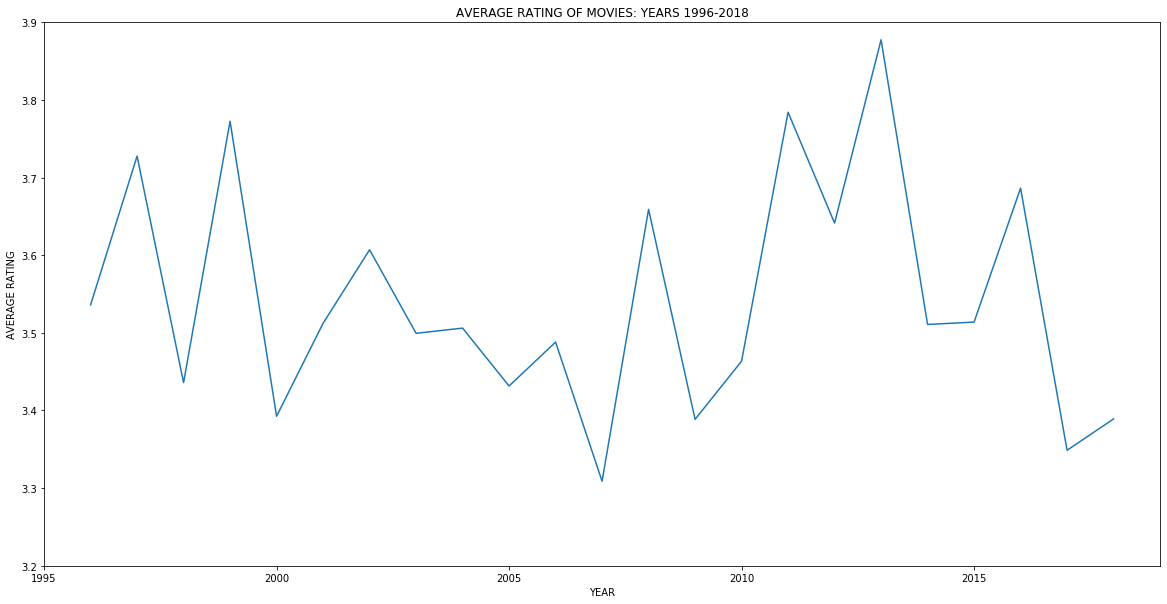

In [20]:
#Using Seaborn to create a lineplot of data
plt.figure(figsize=(20,10)) #Use .figure to increase graph size
ax = (sns
      .lineplot(x="date_year", y="avg_rating", data=rt2) #.lineplot sets x and y values, pass in data set rt2
      .set(xlim=(1995,2019), ylim=(3.2,3.9), xlabel='YEAR', ylabel='AVERAGE RATING')) #Set axis limits and labels
plt.gca().set_title("AVERAGE RATING OF MOVIES: YEARS 1996-2018") #Change graph title

Text(0.5, 1.0, 'AVERAGE RATING OF MOVIES: YEARS 1996-2018')

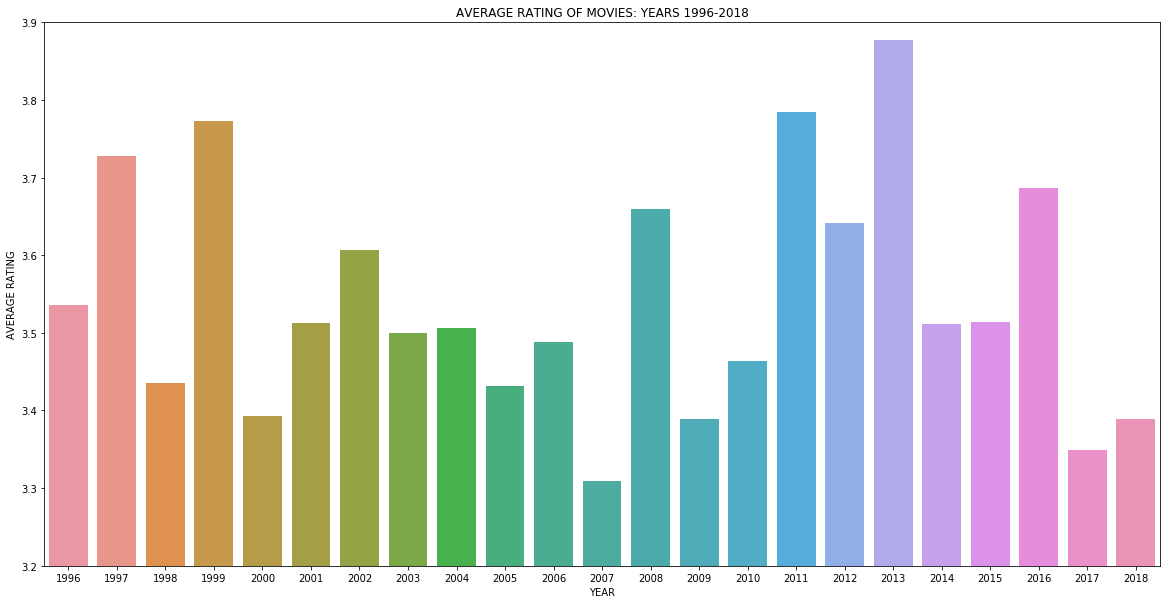

In [21]:
#Using Seaborn to create a boxplot of data
plt.figure(figsize=(20,10))#Use .figure to increase graph size
ax = (sns
      .barplot(x="date_year", y="avg_rating", data=rt2)#.barplot sets x and y values, pass in data set rt2
      .set(ylim=(3.2,3.9),xlabel='YEAR', ylabel='AVERAGE RATING'))#Set axis limits and labels
plt.gca().set_title("AVERAGE RATING OF MOVIES: YEARS 1996-2018") #Change graph title

Analyzing the graphs tells us 2013 had the highest average movie rating and 2007 had the lowest average movie rating. 